# Canonical problem 1

*Steady-state response of an infinite beam on elastic foundation subject to constant and oscillatory moving loads*


In [15]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## Problem 1
*determine the possible ‘free’ harmonic waves in an infinite Euler-Bernoulli beam*

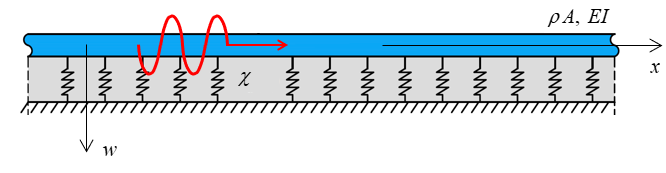

In [16]:
x, t = sym.symbols('x t', real=True)
rho, A, EI, ksi = sym.symbols('rho A EI ksi', positive=True)
values = {EI:6.42E6, rho:1, A: 268.33, ksi: 8.333E7}

omega, k = sym.symbols('omega k')
w = sym.Function('w')(x, t)

w = sym.exp(-sym.I * (omega*t - k*x))

EQM = sym.Eq(rho*A * sym.diff(w, t, 2) + EI * sym.diff(w, x, 4) + ksi * w, 0)

In [17]:
display(EQM.simplify())
disp_eq = EI*k**4 - omega**2 * rho*A + ksi
display(disp_eq/EI.simplify())

Eq((-A*omega**2*rho + EI*k**4 + ksi)*exp(I*(k*x - omega*t)), 0)

(-A*omega**2*rho + EI*k**4 + ksi)/EI

In [18]:
k_sol = sym.solve(disp_eq, k)
wc = np.sqrt(values[ksi]/(values[rho]*values[A]))
display(k_sol)

[-(A*omega**2*rho - ksi)**(1/4)/EI**(1/4),
 (A*omega**2*rho - ksi)**(1/4)/EI**(1/4),
 -I*(A*omega**2*rho - ksi)**(1/4)/EI**(1/4),
 I*(A*omega**2*rho - ksi)**(1/4)/EI**(1/4)]

In [19]:
omega_val = 0.9*wc
wave1 = sym.exp(sym.I * k_sol[0]*x).subs(values).subs({omega: omega_val})
wave2 = sym.exp(sym.I * k_sol[1]*x).subs(values).subs({omega: omega_val})
wave3 = sym.exp(sym.I * k_sol[2]*x).subs(values).subs({omega: omega_val})
wave4 = sym.exp(sym.I * k_sol[3]*x).subs(values).subs({omega: omega_val})

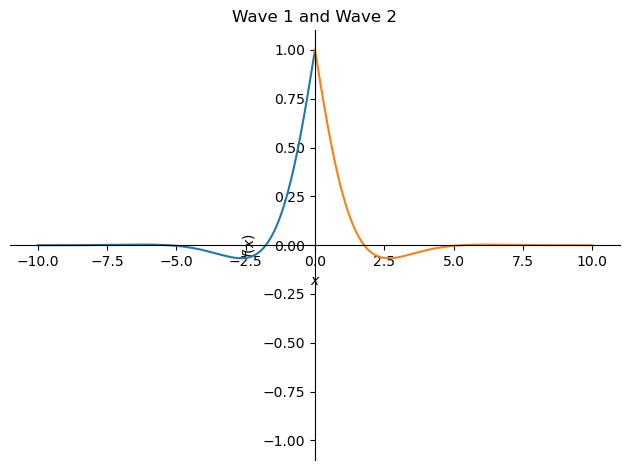

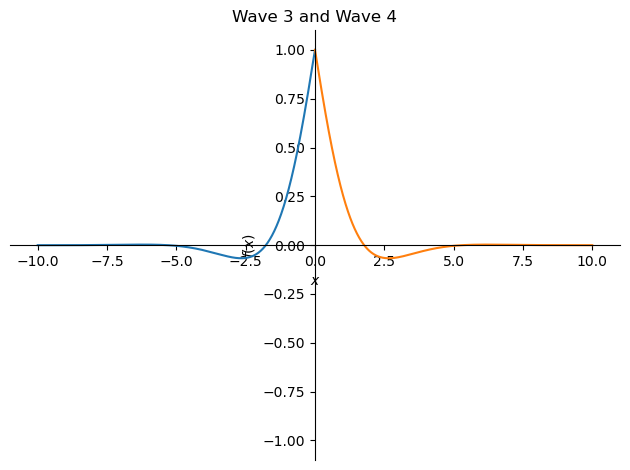

In [20]:
sym.plot((sym.re(wave1), (x,0,-10)), (sym.re(wave2), (x,10,0)), title='Wave 1 and Wave 2', show=True, ylim=(-1.1, 1.1));
sym.plot((sym.re(wave3), (x,0,-10)), (sym.re(wave4), (x,10,0)), title='Wave 3 and Wave 4', show=True, ylim=(-1.1, 1.1));

Eq(k, -(A*omega**2*rho - ksi)**(1/4)/EI**(1/4))

Eq(k, (A*omega**2*rho - ksi)**(1/4)/EI**(1/4))

sqrt(EI*k**4 + ksi)/(sqrt(A)*sqrt(rho))

-sqrt(EI*k**4 + ksi)/(sqrt(A)*sqrt(rho))

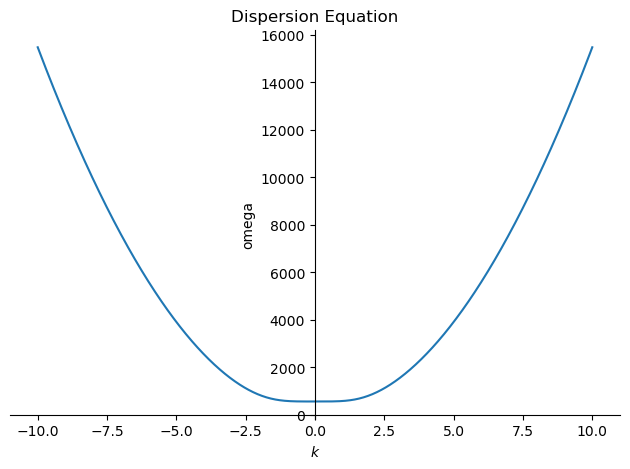

In [21]:
eq1 = sym.Eq(k, k_sol[0])
eq2 = sym.Eq(k, k_sol[1])
display(eq1, eq2)

omega1 = -sym.solve(eq1, omega)[0]
omega2 = sym.solve(eq2, omega)[0]
display(omega1, omega2)

sym.plot(omega1.subs(values), (k,-10,10), title='Dispersion Equation', show=True, xlablel='k', ylabel='omega');

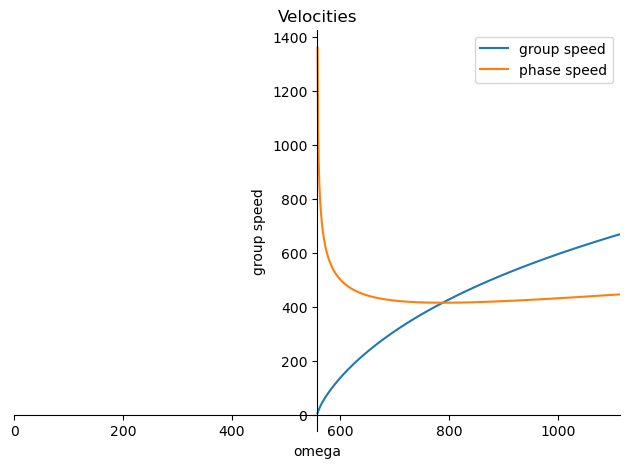

In [22]:
c_phase = omega1/k
c_group = omega1.diff(k)

# sym.plot(c_phase.subs(values), (k,-2,2), title='Phase Velocity', show=True, xlabel='k', ylabel='phase speed');
# sym.plot(c_group.subs(values), (k,-2,2), title='Group Velocity', show=True, xlabel='k', ylabel='group speed');
c_phase_omega = c_phase.subs(k, k_sol[1])
c_group_omega = c_group.subs(k, k_sol[1])

p1 = sym.plot(c_phase_omega.subs(values), (omega,0.1,2*wc), show=False, xlabel='omega', ylabel='phase speed', label='phase speed');
p2 = sym.plot(c_group_omega.subs(values), (omega,0.1,2*wc), title='Velocities', show=False, xlim=(0,2*wc), xlabel='omega', ylabel='group speed', label='group speed', legend=True);
p2.extend(p1)
p2.show()


# Problem 2

*Steady-State response (semi-infinite beam)*

In [23]:
W = sym.Function('W')(x)
C1, C2, C3, C4 = sym.symbols('C1 C2 C3 C4')
F0, wc = sym.symbols('F0 wc')

W = C1*sym.exp(sym.I*k_sol[0]*x) + C2*sym.exp(sym.I*k_sol[1]*x) + C3*sym.exp(sym.I*k_sol[2]*x) + C4*sym.exp(sym.I*k_sol[3]*x)
display(W)

eq1 = sym.Eq(W.diff(x,x).subs(x,0),0)
eq2 = sym.Eq(W.diff(x,x,x).subs(x,0), F0/EI)
eq3 = sym.Eq(C1,0)
eq4 = sym.Eq(C3,0)

sol = sym.solve([eq1, eq2, eq3, eq4], (C1, C2, C3, C4))
sol

C1*exp(-I*x*(A*omega**2*rho - ksi)**(1/4)/EI**(1/4)) + C2*exp(I*x*(A*omega**2*rho - ksi)**(1/4)/EI**(1/4)) + C3*exp(x*(A*omega**2*rho - ksi)**(1/4)/EI**(1/4)) + C4*exp(-x*(A*omega**2*rho - ksi)**(1/4)/EI**(1/4))

{C1: 0,
 C2: -F0*(1 - I)/(2*EI**(1/4)*(A*omega**2*rho - ksi)**(3/4)),
 C3: 0,
 C4: -F0*(1 - I)/(2*EI**(1/4)*(A*omega**2*rho - ksi)**(3/4))}

In [24]:
W = W.subs(sol)

In [25]:
values = {EI:6.42E6, rho:1, A: 268.33, ksi: 8.333E7, F0: 1}
wc = np.sqrt(values[ksi]/(values[rho]*values[A]))

In [26]:
omega_val = 0.9*wc
W_time = sym.re(W.subs(values)*sym.exp(sym.I*omega*t)).subs(omega, omega_val)

In [27]:
W_plot = sym.lambdify([x, t], W_time, "numpy")

In [28]:
# fig, ax = plt.subplots()

# t = np.linspace(0, 2*np.pi/omega_val, 50)
# x = np.linspace(0, 10, 100)

# W_max = np.max(W_plot(0, t))

# line = ax.plot(x, W_plot(x, t[0]))[0]
# ax.set(xlim=[0, 10], ylim=[-1.1*W_max, 1.1*W_max], xlabel='X [m]', ylabel='W [m]', title='Subcritical Omega')

# def update(frame):
#     w = W_plot(x, t[frame])

#     line.set_ydata(w)
#     return (line)


# anim = animation.FuncAnimation(fig=fig, func=update, frames=50, interval=50)
# anim.save(filename="./omega_subcritical.gif", writer="pillow");
# plt.close()

![subcritical omega](./omega_subcritical.gif)
![supercritical omega](./omega_supercritical.gif)